['Заказал данные наушники ребенку, доставка была курьером в определенный день и время. Наушники замечательные, качество звука на высоте, удобные амброшуры.\nТоваром доволен, спасибо)', 'Навушники прикольні, гарної якості. Купувала чоловікові на подарунок, він в захваті від них', 'А какая длина шнура?', 'Добрий день!\nДякую, що обрали продукт нашої компанiї.\n\nКабель гарнітури - 1.3 метри, подовжувач-перехідник для ПК - 1.7 метри.', "Не работает двойной роз'єм но работает только звук а микрофон не работает поетому", 'Добрий день!\nДякую, що обрали продукт нашої компанiї.\n\nШановний Матвiй! Дякую, що знайшли час i залишили нам вiдгук. Дозвольте принести вам свої вибачення за ту проблему, з якою ви зiткнулися. Сталося деяке непорозумiння.\n\nВарто перевірити гарнітуру на телефоні - чи взагалі працює мікрофон. Якщо працює - можна перевірити перехідник на іншому ПК чи ноутбуці. Якщо він справний - можна перевірити чи дозволено системі працювати з мікрофоном в "Центрі безпеки".', 'Купил на

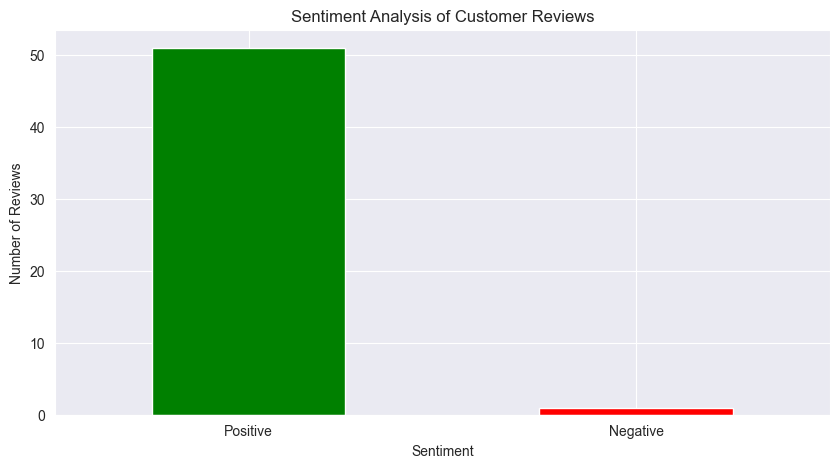

In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


# Встановлюємо шлях до драйвера
driver = webdriver.Chrome()
# Посилання на сайт
url = 'https://rozetka.com.ua/ua/hyperx_hx_hscs_bk_ee/p11689745/comments/'
#Передаємо драйверу посилання по якому потрібно перейти
driver.get(url)
# Через f12 дивимося на структуру сайту та шукаємо елемент в якому лежать відгуки які нам потрібно дістати
reviews = driver.find_elements(By.XPATH, '//p[@class="ng-star-inserted"]')
#Даємо списку дані які ми витягнули
review_list = [review.text for review in reviews]
# Виводимо дані
print(review_list)
# Закриваємо браузер
driver.close()
# Створюємо датафрейм та передаємо йому дані зі списку
df = pd.DataFrame(review_list, columns=['Review'])
# Збережемо у файл CSV
df.to_csv('reviews.csv')
# Створюємо зміну і читаємо наш файл
reviews_df = pd.read_csv('reviews.csv')


# Функція для виявлення настрою огляду
def detect_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return "Neutral"
    elif blob.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Positive"

# Застосувати виявлення настроїв до оглядів
reviews_df['Sentiment'] = reviews_df['Review'].apply(detect_sentiment)

# Підрахуйте кількість кожного почуття
sentiment_counts = reviews_df['Sentiment'].value_counts()

# Побудова розподілу настроїв
# Створюємо фігуру і задаємо розміри
plt.figure(figsize=(10,5))
# Задаємо стилі для наших стовбців
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
# Даємо назву графіку
plt.title('Sentiment Analysis of Customer Reviews')
# Назва для осі Х
plt.xlabel('Sentiment')
# Назва для осі Y
plt.ylabel('Number of Reviews')
# Повертаємо назви для зручності читання
plt.xticks(rotation=0)
# Виводимо наш графік
plt.show()

